# Imbalanced Learning Pipeline

In this short notebook I build a classification pipeline with the imblearn python library. The advantage of using it, is that it only applies the resampling strategies on the training data.

In [55]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
seed=12

Create data and separate training and testing

In [56]:
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.05, 0.95], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=10000, random_state=10)
nsamples, nfeatures = X.shape
print(f"Number of features: {nfeatures}")
print(f"Total samples: {nsamples}")
print(f"Number of samples of minority class: {nsamples-sum(y)}")
X_train, X_test, y_train, y_test = tts(X, y, random_state=seed, stratify=y)


Number of features: 20
Total samples: 10000
Number of samples of minority class: 500


Procedure without pipeline:
1. Oversample training data
2. Apply PCA for dimensionality reduction
3. Train model
4. Transform test data on PCA
5. Predict test data
6. Evaluate

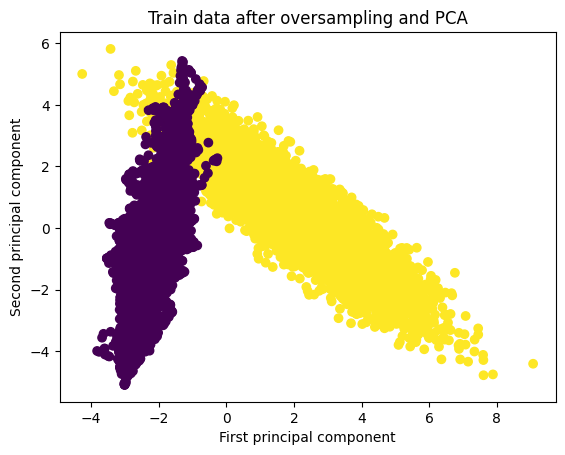

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       125
           1       1.00      0.98      0.99      2375

    accuracy                           0.98      2500
   macro avg       0.88      0.97      0.92      2500
weighted avg       0.99      0.98      0.98      2500



In [57]:
pca = PCA(n_components =2, random_state=seed)
smt = SMOTE(random_state=seed)
knn = KNN()

# Oversample training data
X_train, y_train = smt.fit_resample(X_train, y_train)
# Apply PCA for dimensionality reduction
pca = pca.fit(X_train)
X_train = pca.transform(X_train)
# plots
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train)
plt.title("Train data after oversampling and PCA")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

# train model
model = knn.fit(X_train, y_train)

# Transform test data on PCA
X_test = pca.transform(X_test)
y_hat = model.predict(X_test)
print(classification_report(y_test, y_hat))

This can be done altogether with the Pipeline class from the imblearn library.

In [58]:
pca = PCA(n_components =2, random_state=seed)
smt = SMOTE(random_state=seed)
knn = KNN()
pipeline = Pipeline([('oversampling', smt), ('pca', pca), ('knn', knn)])
pipeline.fit(X_train, y_train)

y_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       125
           1       1.00      0.98      0.99      2375

    accuracy                           0.98      2500
   macro avg       0.88      0.97      0.92      2500
weighted avg       0.99      0.98      0.98      2500

